# COGS 108 - Wildfires and Environmental Variables


# Permissions

*   [X] YES - make available
*   [ ] NO - keep private


# Overview

As California residents, we've witnessed the prevalence of wildfires all across the state, and decided to look at which factors contribute to and might predict the occurrence of a wildfire. Specifically, we looked at 20 counties in Northern California, and wildfires occurring rom 2018 to 2020, as they seem to be getting more intense and common in recent years.

Through our visualizations and analysis of the data, we found a statistically significant correlation between precipitation and temperature in wildfire occurrences, meaning that wildfires were most likely to occur during months with especially high temperatures and low levels of precipitation.

# Names

- Kairi Sageshima
- Brandon Wang
- Marisol Jimenez
- Ashley Chu
- Daniel Milton

<a id='research_question'></a>
# Research Question

*Which factor is most influential in predicting the likelihood of a forest fire in the Northern Region (Department of Forestry and Fire Protection) of California: temperature or precipitation in the region? Can we use such variables to predict and serve as an early warning system for wildfires in California?*

# Background and Prior Work

An increase in wildfires in California have been an issue in recent years, and geologists have pointed to a number of factors that have been attributed to this increase. Factors such as drought season, combustible material, ambient environmental variables such as temperature, humidity, and vapor pressure deficit, grass coverage, weather patterns, and distance to roads have been some factors identified. To concentrate on easily quantifiable data, we decided to use temperature and humidity levels of the area to serve as predictors of wildfires, as other factors will require extensive coding and wrangling to make into quantitative variables. Hopefully, we will be able to build a model that can reliably predict areas of high wildfire probability to serve as an early warning system.

### References (include links):

**Source 1:** https://earthobservatory.nasa.gov/images/148908/whats-behind-californias-surge-of-large-fires

1) The number of wildfires in California has been proliferating in recent years. “Eight of the state’s ten largest fires on record—and twelve of the top twenty—have happened within the past five years.” Jon Keeley, a U.S. Geological Survey scientist, claims that many factors may be responsible for this increase. The primary reasons seem to be a particularly harsh drought season and rising temperatures due to global warming. Decades of fire suppression have also allowed highly combustible material to pile up and create hotspots for forest fires.

**Source 2:** https://www.nature.com/articles/s41598-021-88131-9

2)  As seen on the news, wildfires have become more and more of a common occurrence, especially in California. “The wildfire season has lengthened and the peak months have been advanced from August to July. In terms of the variables related to the risk of wildfire occurrence, the temperature, vapor pressure deficit, grass cover, and the distance to roads are crucial.” These are some additional variables that previous projects have been aware of in the past. The increase of temperature does have a direct correlation with occurrence of wildfires, but there are also many other factors in the mix.

**Source 3:** https://www.predictiveservices.nifc.gov/outlooks/monthly_seasonal_outlook.pdf

3) Common predictors of wildfires in Northern California as researched and identified by the National Interagency Fire Center are: drought conditions (below average levels of precipitation, above average temperatures), live and dead fuel moisture contents, and enhanced windy periods. These weather patterns are influenced by sea temperatures, El Niño and the time of year.
Live fuel moisture content refers to the amount of moisture in living plants/vegetation that could be consumed as fuel in a forest fire.
In Southern California, upper level high pressure over the Desert Southwest causes higher than average temperatures during the late summer/early fall months. Thunderstorms also start fires (such as the Windy and KNP Complex Fires in southern central California).
Upper level highs occur where there is especially high pressure in the upper atmosphere of a particular region, causing “comparatively warm dry air with light winds over a large area” — National Wildfire Coordinating Group. Upper level highs are caused by above normal sea surface temperatures.

Other similar projects on predicting wildfires focused on weather events as well, but also location, such as this one: Wildfires in California Prediction. In this project, they learned how to create a model that could essentially predict that 2019 was not a “bad” year for wildfires.

If we can, we will try to account for location using humidity, and the amount of live and dead moisture content (availability of combustible fuel), as they would point to locations such as forests where fires commonly happen.
Hypothesis

We predict that an increase in temperature and a decrease in humidity will lead to higher chance of fires, and a decrease in temperatures or an increase in humidity will predict a lower chance of fires.
Data

The variables needed for this analysis are: Count and location of fires in california. Average temperature of region during the time period of the fire, Humidity or lack thereof at location of fire during the same time period. The amount of combustible materials at the fire location. 

This data of fire frequency, location and date has been collected by the California fire department . As for the climate data it can be accessed through https://climatetoolbox.org/ and https://www.usclimatedata.com/  which provides records of temperature, vegetation, water and drought data for any region within the US. These data frames would have to be imported, cleaned and combined to make the ideal data set to answer the research question. 
 
We will collect data by collecting the temperature and humidity data from each record of a fire in California in the last year. We can go further back in years if needed to expand our statistical validity with more observations, but for now to limit the scope of the data collected we will focus on the year of 2021. 

Data will be stored as a CSV, with columns for timestamp, location, temperature, humidity, drought, and vegetation presence. Data wrangling will ensure that the temperature and humidity variables are stored as floats in decimal notation, while location will be used as a categorical variable. Timestamps will he converted into an appropriate time object (or coded integer) for parsing, and drought and vegetation will be stored as coded indexes for meaningful comparisons.


# Hypothesis

We predict that an increase in temperature and a decrease in precipitation will lead to higher chance of fires, and a decrease in temperatures or an increase in precipitation will predict a lower chance of fires.


# Dataset(s)

**Wildfire Incident Database**

Link to the dataset: https://gis.data.ca.gov/datasets/e3802d2abf8741a187e73a9db49d68fe_0/explore?showTable=true
Number of observations: 21,318 observations
This database logs wildfire incidents by county/forest in California, and also records the cause, timestamp recorded, and the timestamp it was contained. 

**Weather Database**

Link to the dataset: https://www.ncdc.noaa.gov/cag/county/mapping/4/tavg/201802/1/value
Number of observations: 88,219 observations
This database holds the average temperature for each county of California in each month from 2018-2020.

We plan to use the wildfire incident database to gather observations of wildfires in our selected counties by timestamp and location. We then plan to match the timestamp and location from the fire to the environmental variables from the weather database, so we can see the temperature at the given location and time. 



# Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# Statmodels & patsy
import patsy
import statsmodels.api as sm

In [3]:
  ## Import the wildfire data csv
df = pd.read_csv('fire.csv')
## Import the temperature data csv
dfw = pd.read_csv('temp.csv')
## Import the precipitation data csv
dfp = pd.read_csv('precipitation.csv')

df

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,SHAPE_Length,SHAPE_Area
0,21440,2020.0,CA,CDF,NEU,NELSON,00013212,2020/06/18 00:00:00+00,2020/06/23 00:00:00+00,11.0,NaN,110.0,109.602500,1.0,1.0,NaN,4179.743142,-7.331347e+05
1,21441,2020.0,CA,CDF,NEU,AMORUSO,00011799,2020/06/01 00:00:00+00,2020/06/04 00:00:00+00,2.0,NaN,670.0,685.585020,1.0,1.0,NaN,12399.375391,-4.578172e+06
2,21442,2020.0,CA,CDF,NEU,ATHENS,00018493,2020/08/10 00:00:00+00,2020/03/01 00:00:00+00,14.0,NaN,26.0,27.300480,1.0,1.0,NaN,2119.194120,-1.823876e+05
3,21443,2020.0,CA,CDF,NEU,FLEMING,00007619,2020/03/31 00:00:00+00,2020/04/01 00:00:00+00,9.0,NaN,13.0,12.931550,1.0,1.0,NaN,2029.524881,-8.667942e+04
4,21444,2020.0,CA,CDF,NEU,MELANESE,00008471,2020/04/14 00:00:00+00,2020/04/19 00:00:00+00,18.0,NaN,10.3,10.315960,1.0,1.0,NaN,1342.742903,-7.017912e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21313,42760,2019.0,CA,CCO,LAC,MUREAU,NaN,2019/10/30 00:00:00+00,2019/10/30 00:00:00+00,NaN,NaN,NaN,6.297734,NaN,1.0,NaN,897.323534,-3.730642e+04
21314,42761,2019.0,CA,LRA,NaN,OAK,NaN,2019/10/28 00:00:00+00,2019/10/28 00:00:00+00,14.0,NPS#596 Rapid ROS in light grassy 1yr old fuels,NaN,8.482671,8.0,1.0,NaN,1215.382952,-5.024716e+04
21315,42762,2019.0,CA,LRA,LDF,BARHAM,00000845,2019/11/09 00:00:00+00,2019/11/10 00:00:00+00,14.0,LACFD 0845,NaN,64.888229,8.0,1.0,NaN,4093.657796,-3.843117e+05
21316,42763,2019.0,CA,NPS,MNP,STAR,00013598,NaN,NaN,14.0,NaN,NaN,66.587181,8.0,1.0,NaN,4777.042672,-4.051741e+05


# Data Cleaning

When choosing our data set we decided on using data from California where most wildfires occurances have increased in the past couple of years. This motivated us to focus on data from the years 2018 to 2020, the period with the most drastic increase in fires. Because California has a high variety of climates and biomes a generalization of the whole state would have caused many confounds and unwanted generalizations. Therefore to better focus our hypothesis we decided to focus on only northern California counties. To facilitate isolation of interested counties we made a county dictionary with all relevant counties and their abreviation. 

In [4]:
# County Dictionary
county_dict = {
    'Yuba County': 'NEU',
    'Nevada County': 'NEU',
    'Placer County': 'NEU',
    'Butte County' : 'BTU',
    'San Mateo County' : 'CZU',
    'Santa Cruz County' : 'CZU',
    'Mendocino County' : 'MEU',
    'Humboldt County' : 'HUU',
    'Del Norte County' : 'HUU',
    'Tehama County' : 'TGU',
    'Glenn County' : 'TGU',
    'Lassen County' : 'LMU',
    'Modoc County' : 'LMU',
    'Siskiyou County' : 'SKU',
    'Shasta County' : 'SHU',
    'Trinity County' : 'SHU',
    'Santa Clara County' : 'SCU',
    'Sonoma County' : 'LNU',
    'Lake County' : 'LNU',
    'Napa County' : 'LNU',
    'Marin County' : 'MRN',
    'El Dorado County' : 'AEU',
    'Amador County' : 'AEU'
}

# Counties we are interested in
# counties = ['SKU', 'HUU', 'SHU', 'LMU', 'TGU', 'MEU', 'BTU', 'NEU', 'AEU', 'LNU', 'SHF', 'TNF', 'PNF', 'HIA', 'LNF',
#            'KNF', 'MNF', 'SRF', 'BNP', 'RNP']
counties = ['SKU', 'HUU', 'SHU', 'LMU', 'TGU', 'MEU', 'BTU', 'NEU', 'AEU', 'LNU']

## Cleaning Fire Dataset

Cleaning the Fire dataset included using the county dictionary to isolate the fires only in the norther counties. Unessesary columns were dropped to focus the data set on only the columns which provided information about the location, date and area the fire affected. We dropped the unnecessary columns, changed column names and made all columns lower case to make the header the the dataset uniform. To make the merge of the fire and weather datasets easier the fire dates were changed from DateTime objects to integers including only the month and day. Finally we dropped all columns with empty cells to make sure future coding ran smoothly.

In [5]:
## Cleaning fire data set
# Rename columns
df = df.rename(columns = {'UNIT_ID' : 'county'})
# Drop unused columns
df = df.drop(columns = ['OBJECTID', 'AGENCY', 'INC_NUM', 'COMMENTS', 'REPORT_AC', 'SHAPE_Length', 'SHAPE_Area', 'FIRE_NUM', 'OBJECTIVE', 'C_METHOD'])
df = df.reset_index()
# Change to lowercase
df.columns = df.columns.str.lower()
# Only want the counties interested in
df = df[df['county'].isin(counties)]
# Convert dates into ints
df['alarm_date'] = pd.to_datetime(df['alarm_date'])
df['date_conv'] = (df['alarm_date'].dt.year.fillna(0).astype(int)).astype(str) + (df['alarm_date'].dt.month.fillna(0).astype(int)).astype(str)
df['date_conv'] = df['date_conv'].astype(int)
df = df.drop(columns = ['year_', 'alarm_date', 'cont_date'])
# Only want 2018 - 2020
df = df[df.date_conv > 201800]
df = df[df.date_conv < 202100]
# Drop NA values
df = df.dropna()

## Cleaning Temperature Dataset


Cleaning the temperature data set involved dropping unused columns, then renaming certain columns. We then created a region column for us to use later. We made a function that allowed us to convert county names to its corresponding county ID. We used this function and applied it to the county column and assigned it to the region column we created earlier. We then filtered the dates to only include years between 2018 and 2020. Finally, we then dropped all NA values in the dataframe.

In [6]:
# Drop unused columns
dfw = dfw.drop(columns = ['Location ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean']) 
# Rename columns
dfw = dfw.rename(columns = {'Location':'county', 'Value':'temperature'})
# Create ‘region’ column
dfw.assign(region = '')
# Change to lowercase
dfw.columns = dfw.columns.str.lower()

# Function to change County full name to county ID in temp.csv
def County_toID(county):
       if county in county_dict:
            return county.replace(county, county_dict[county])

# Convert counties to regions
new_county = dfw['county'].apply(County_toID)
dfw['region'] = new_county

# Filter out dates
dfw = dfw[dfw.date > 201800]
dfw = dfw[dfw.date < 202100]

# Drop NA values
dfw = dfw.dropna()


In [7]:
df

,index,state,county,fire_name,cause,gis_acres,date_conv
12,12,CA,NEU,FIELDS,5.0,55.328430,202010
28,28,CA,HUU,REDWOOD,2.0,101.400300,202010
34,34,CA,HUU,MINE,5.0,11.074130,202012
37,37,CA,BTU,GRAND,14.0,31.061090,202010
45,45,CA,NEU,SIMPSON,14.0,28.574560,202010
47,47,CA,NEU,LOCUST,5.0,15.859510,202012
120,120,CA,SHU,POINT,9.0,48.147720,202010
127,127,CA,SHU,DERSCH,7.0,133.299500,202010
147,147,CA,AEU,CAMERON FIRE,10.0,14.426010,202010
149,149,CA,AEU,LAMBERT FIRE,9.0,21.816271,202010


In [8]:
dfw['region'].unique()

array(['AEU', 'BTU', 'HUU', 'TGU', 'LNU', 'LMU', 'MRN', 'MEU', 'NEU',
       'CZU', 'SCU', 'SHU', 'SKU'], dtype=object)

In [9]:
## Create a temp column for wildfires and grab data from temp dataset based on region

# Create ‘temp’ column
df.assign(temp = '')

temp_region = dfw.groupby(['region', 'date']).mean()
temp_region.loc['BTU', 201805]

# Function to get averages
# @param region
# @param date int
def getTempForRegion(region, date):
    return temp_region.loc[region, date]
        

# Apply function to temp column
df['temp'] = df.apply(lambda x: getTempForRegion(x['county'], x['date_conv']), axis=1)


In [10]:
temp_region.loc['AEU', 201805]

temperature    59.3
Name: (AEU, 201805), dtype: float64

In [11]:
df

,index,state,county,fire_name,cause,gis_acres,date_conv,temp
12,12,CA,NEU,FIELDS,5.0,55.328430,202010,64.600000
28,28,CA,HUU,REDWOOD,2.0,101.400300,202010,60.300000
34,34,CA,HUU,MINE,5.0,11.074130,202012,43.450000
37,37,CA,BTU,GRAND,14.0,31.061090,202010,68.400000
45,45,CA,NEU,SIMPSON,14.0,28.574560,202010,64.600000
47,47,CA,NEU,LOCUST,5.0,15.859510,202012,43.800000
120,120,CA,SHU,POINT,9.0,48.147720,202010,61.800000
127,127,CA,SHU,DERSCH,7.0,133.299500,202010,61.800000
147,147,CA,AEU,CAMERON FIRE,10.0,14.426010,202010,66.200000
149,149,CA,AEU,LAMBERT FIRE,9.0,21.816271,202010,66.200000


## Cleaning the precipitation dataset

The cleaning of our precipitation dataset was very similar to the temperature clean up, we focused only on the date, location and time. The columns names were changed accordingly. All observation not during the years of 2018 and 2020 were drops along with the observation not in the counties of interest. Finally based on the region the data observations that matched with those in the fire dataset (based on dates) were them pulled from the precipitation data set and added to the fire data set in a new column "precipitation".

In [12]:
# cleaning  and renaming columns 
dfp = dfp.drop(columns = ['Location ID', 'Rank','Anomaly (1901-2000 base period)', '1901-2000 Mean'])
dfp.head()

,Location,Date,Value
0,Alameda County,189501,8.43
1,Alameda County,189502,2.09
2,Alameda County,189503,1.97
3,Alameda County,189504,1.75
4,Alameda County,189505,1.20


In [13]:
# Rename columns
dfp = dfp.rename(columns = {'Location':'county', 'Value':'precipitation (inches)'})
# Create ‘region’ column
dfp.assign(region = '')

# Change to lowercase
dfp.columns = dfp.columns.str.lower()
dfp.head()

,county,date,precipitation (inches)
0,Alameda County,189501,8.43
1,Alameda County,189502,2.09
2,Alameda County,189503,1.97
3,Alameda County,189504,1.75
4,Alameda County,189505,1.20


In [14]:
# Function to change County full name to county ID in temp.csv
def County_toID(county):
       if county in county_dict:
            return county.replace(county, county_dict[county])

In [15]:
dfp['county'].apply(County_toID)

0        None
1        None
2        None
3        None
4        None
         ... 
88271     NEU
88272     NEU
88273     NEU
88274     NEU
88275     NEU
Name: county, Length: 88276, dtype: object

In [16]:
dfp

,county,date,precipitation (inches)
0,Alameda County,189501,8.43
1,Alameda County,189502,2.09
2,Alameda County,189503,1.97
3,Alameda County,189504,1.75
4,Alameda County,189505,1.20
...,...,...,...
88271,Yuba County,202106,0.02
88272,Yuba County,202107,0.01
88273,Yuba County,202108,0.00
88274,Yuba County,202109,0.23


In [17]:
# Convert counties to regions
new_county = dfp['county'].apply(County_toID)
dfp['region'] = new_county

# Filter out dates
dfp = dfp[dfp.date > 201800]
dfp = dfp[dfp.date < 202100]

# Drop NA values
dfp = dfp.dropna()


In [18]:
## Create a precipitaion column for wildfires and grab data from precipitation dataset based on region
# Create ‘precipitation’ column
df.assign(precipitation = '')

prec_region = dfp.groupby(['region', 'date']).mean()
prec_region.loc['BTU', 201805]


precipitation (inches)    0.52
Name: (BTU, 201805), dtype: float64

In [19]:
# Function to get averages
#@param region
#@param date int
def getPrecForRegion(region, date):
    return prec_region.loc[region, date]
        

# Apply function to temp column
df['precipitation'] = df.apply(lambda x: getPrecForRegion(x['county'], x['date_conv']), axis=1)

In [20]:
len(df)

32



# Data Analysis & Results (EDA)

In [21]:
df

,index,state,county,fire_name,cause,gis_acres,date_conv,temp,precipitation
12,12,CA,NEU,FIELDS,5.0,55.328430,202010,64.600000,0.010000
28,28,CA,HUU,REDWOOD,2.0,101.400300,202010,60.300000,0.940000
34,34,CA,HUU,MINE,5.0,11.074130,202012,43.450000,8.435000
37,37,CA,BTU,GRAND,14.0,31.061090,202010,68.400000,0.000000
45,45,CA,NEU,SIMPSON,14.0,28.574560,202010,64.600000,0.010000
47,47,CA,NEU,LOCUST,5.0,15.859510,202012,43.800000,3.676667
120,120,CA,SHU,POINT,9.0,48.147720,202010,61.800000,0.105000
127,127,CA,SHU,DERSCH,7.0,133.299500,202010,61.800000,0.105000
147,147,CA,AEU,CAMERON FIRE,10.0,14.426010,202010,66.200000,0.015000
149,149,CA,AEU,LAMBERT FIRE,9.0,21.816271,202010,66.200000,0.015000


### Structure
For our data, we combined three different tabular CSV datasets: forest fire, temperature, and precipitation rates for regions in Northern California. The forest fire data set provided data for fire districts per the Department of Forestry and Fire Protection, while the temperature and precipitation data was per California county. In order to combine the data consistently into a dataset, we used the average temperature and precipitation rates between the counties in each district. For example, the ‘NEU’ region represents Nevada, Yuba, and Placer county, so we created an average monthly temperature/precipitation value between the 3 counties. In doing so, we were able to ensure that each observation in our dataset is in a separate row.
The columns in our dataset show data on the region, date, temperature, and precipitation. The region column stores an object data type, the date column stores an integer data type, and the temperature and precipitation columns store float data types. These are all the variables that we need in order to answer our research question of whether temperature or precipitation rates are a better predictor of forest fires in Northern California. We joined the data according to the region IDs of the forest fire dataset, so all the other variables line up in accordance with this.

### Granularity
Each observation in our Dataset is an individual-level record, where each one represents a single wildfire incident in specified Northern California counties. All records in the dataset are uniformly individual, no wildfires have been grouped together so each record is its own wildfire incident.
The temperature column for each wildfire is the mean temperature in the region during that given month. This was taken from a temperature dataset that held group-level records that were summarized by counties. The precipitation column for each wildfire is the average inches of rainfall in that region during that given month, and was taken from a dataset that held group-level observations for specified counties.. Therefore, the granularity for temperature and precipitation are group-level and are constrained to the region of the wildfire, while the granularity of the wildfire records themselves are all individual-level. 

### Scope

For our dataset, we focused on Northern California counties, specifically:
- SKU: Siskiyou County
- HUU: Humboldt, Del Norte Counties
- SHU: Shasta, Trinity Counties
- LMU: Modoc County
- TGU: Tehama, Glenn Counties
- MEU: Mendocino County
- BTU: Butte County
- NEU: Yuba, Nevada, Placer Counties
- AEU: El Dorado, Amador Counties
- LNU: Sonoma, Lake, Napa Counties

For temperature and precipitation data, we use mean data for the wildfire's given month, as it was the most accessible data that we could find. Ideally, it would be more accurate to get each wildfire's temperature and precipitation for the given time and location, but we were unable to find datasets with this level of detail. 

##### Distributions

In [22]:
df.describe()

,index,cause,gis_acres,date_conv,temp,precipitation
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,9915.375000,8.625000,7521.214495,201944.750000,59.071875,1.341250
std,10519.168552,3.824792,29930.740114,78.693772,7.262886,2.185566
min,12.000000,2.000000,0.965376,201810.000000,43.450000,0.000000
25%,142.000000,5.000000,15.672586,201910.000000,53.312500,0.016667
50%,479.000000,9.500000,45.161378,202010.000000,60.533333,0.238333
75%,21030.250000,11.000000,212.667878,202010.000000,65.000000,1.477500
max,21174.000000,14.000000,153335.560000,202012.000000,68.400000,8.435000


From the descriptive table, we see that after our limitation on Northern California counties, we have 32 records left to work with. We also found that there is a mean temperature of 59 degrees Fahrenheit in our regions, and the mean inches of rainfall is about 1.34 inches. We also see that the dates covered are between the start of 2018 and the end of 2020. 

Temperature ranges from 43.45 < t < 68.4
Precipitation ranges from 0 < p < 8.435

Text(0.5, 1.0, 'Count of Fires at Mean Inches of Rainfall per Month')

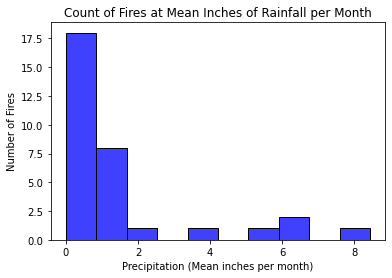

In [23]:
# Find distribution of precipitation variable
ax2 = sns.histplot(data = df , x = 'precipitation', color = 'blue')
ax2.set_xlabel('Precipitation (Mean inches per month)')
ax2.set_ylabel('Number of Fires')

ax2.set_title('Count of Fires at Mean Inches of Rainfall per Month')

The precipitation histogram shows a higher concentration of wildfires occuring in low precipitation, with fewer cases occuring as precipitation increases. Precipitation is coded in terms of mean inches of rainfall per month in the area of the wildfire, so it makes sense that the more rainfall the fewer cases of wildfires. There does not seem to be any extreme cases of outliers in the precipitation distribution, though the wildfire case with a precipitation of 8 seems odd.

Text(0.5, 1.0, 'Count of Fires at Average Temperatures per Month')

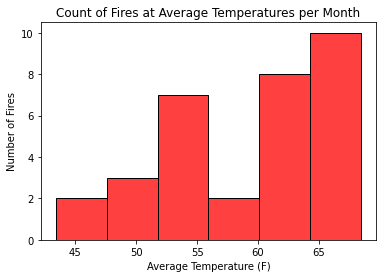

In [24]:
# Find distribution of temp variable
ax2 = sns.histplot(data = df , x = 'temp', color = 'red')
ax2.set_xlabel('Average Temperature (F)')
ax2.set_ylabel('Number of Fires')

ax2.set_title('Count of Fires at Average Temperatures per Month')

The temperature histogram shows a higher concentration of wildfires occuring in higher temperatures. The count of wildfire cases seems to gradually slope off as temperature gets lower. Temperature is coded in terms of the monthly average temperature in the area of the wildfire, so it makes sense that the higher the temperatures the higher amount of wildfire cases. There does not seem to be any extreme cases of outliers in the precipitation distribution.

### Relationships

Text(0.5, 1.0, 'Distribution of Fires at Different Temperatures and Precipitation Levels ')

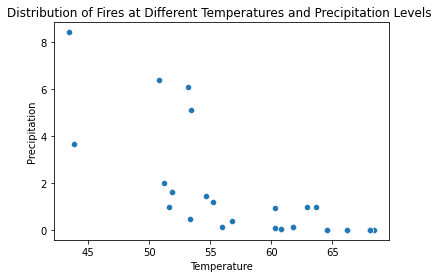

In [25]:
# Find relationship between temp and precipitation
ax = sns.scatterplot(data=df, x='temp', y='precipitation')
ax.set_xlabel('Temperature')
ax.set_ylabel('Precipitation')

ax.set_title('Distribution of Fires at Different Temperatures and Precipitation Levels ')

In a temperature vs precipitation scatter plot, there seems to be an inverse linear relationship between the two variables. Most of the cases are concentrated where temperatures are higher (50 < t < 70), and precipiation is lower (p < 2). There are a few wildfire cases that occur with lower temps and higher precipitations. There is also an extreme outlier, where a wildfire occured at both the lowest temperature and the highest precipitation. 

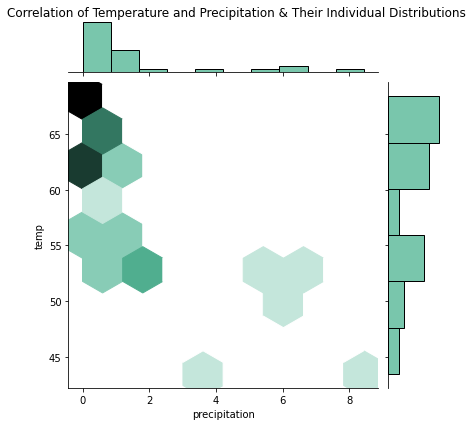

In [28]:
# See where most wildfires occur on a temp vs precipitation plot
p = sns.jointplot(data=df, x='precipitation', y='temp', kind="hex", color="#4CB391")
p.fig.suptitle("Correlation of Temperature and Precipitation & Their Individual Distributions")
p.fig.subplots_adjust(top=0.95)

Similar to the scatterplot above, this hex plot shows that the highest concentration of wildfires occured at the lowest range of precipitation and the highest range of temperatures, and drops off steeply as precipiation increases and temperature lowers. 

### Temporality
The temporality of our data is represented by the year and month the alarm was called for each fire. Every datetime data point is from the Pacific Standard Time as all the data points are from northern California. These dates are represented in the dataframe as integers beginning with the four numbers of the year and ending with the last two digits of the specific month such that a data point with the date of  January of the year 2019 would look like (201901). 
In our dataset there were no null responses in any of the columns and therefore we did not need to set a date for null entries. We did begin with different dates in each of the data frames, for the fire data set the starting dates were represented by the year- month - day and time yet in the average precipitation and average temperature data sets the date were only provided as averages for each month thus to consolidate the data frames to only include the data points we wanted we changes the fire data set date format to match those in the precipitation and temperature data and used these dates to find the averages needed for each fire alarm date. 
In this data set the variables are stationary meaning that as time goes on the mean or average does not change because the dates simply represent the start of the fire and they do not influence any other variable within the dataset and thus should not influence the future mean and average predictions. 

### Faithfulness
Our data values are reasonable and what we would expect, as the dates are valid and drawn from counties in Northern California. Although we have some slight outliers, most of the data is clustered together and the outliers are still relatively plausible since our measurements of temperature are averages of temperatures per month, as opposed to the exact temperature of the start of the fire.
There are no inconsistencies across tables, as it makes sense that the higher the temperature, the less likely it is to rain or have precipitation, and no values are stored or counted more than once.
From our inspection, the data does not have inconsistencies or signs of falsification; our source (the Global Historical Climatology Network daily) also screens the data (for impossible values and extreme outliers such as those outside of 6 standard deviations of the surrounding data) before integrating it into their database which we used.


# Data Analysis and Results

We will use linear regression to see how well temperature can predict precipitation for these wildfire cases. While we are not interested in predicting precipitation, we will run an OLS analysis to run a statistical test and find the p-value of the datapoints to see if there is statistical power of temperature on precipitation in the case of the wildfires. In other words, how likely are the chances that we would see these datapoints (wildfire cases) or something more extreme from the linear regression model. 

### Lets see a visualization of the linear regression line and run OLS analysis.

Text(0.5, 0.98, 'Line of best fit for temperature vs. precipitation')

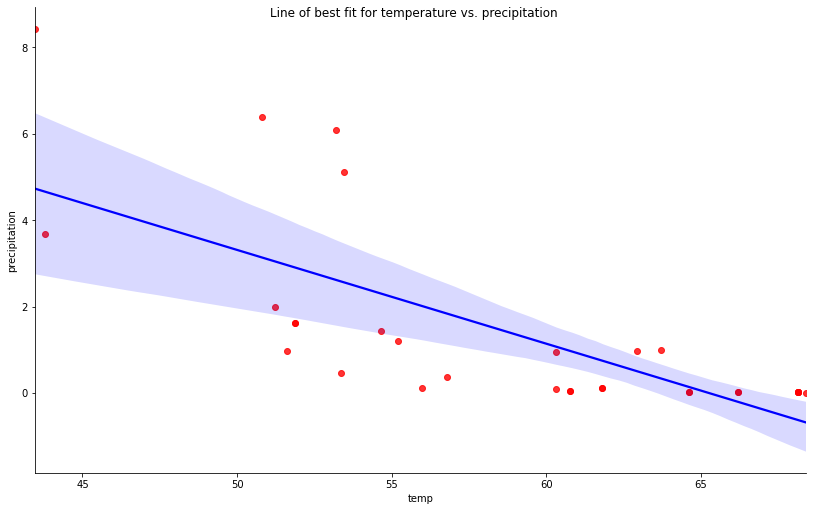

In [31]:
p2 = sns.lmplot(
    x = 'temp',
    y = 'precipitation',
    data = df,
    fit_reg = True,
    scatter_kws = {'color':'red'},
    line_kws = {'color':'blue'},
    aspect = 1.6,
    height = 7
)
p2.fig.suptitle("Line of best fit for temperature vs. precipitation")

In [30]:
df_linreg = df[['temp','precipitation']]
outcome, predictors = patsy.dmatrices('temp ~ precipitation', df)
mod_log = sm.OLS(outcome, predictors)
fit_res = mod_log.fit()

print(fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     32.54
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           3.19e-06
Time:                        23:29:54   Log-Likelihood:                -96.593
No. Observations:                  32   AIC:                             197.2
Df Residuals:                      30   BIC:                             200.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        62.2869      1.065     58.472

We see that the linear regression model has the equation of y = -2.3970x + 62.2869

We also see the p-value is approx. 0, which in the case of our statistical test p = approx. 0 < 0.05, so this means that there is a statistically significant correlation between temperature and precipitation in wildfire cases. While this cannot be used to predict wildfires, this at least tells us that there is a correlation between temperature and precipitation in wildfire cases, and that these factors could be factors that influences the likelihood of a wildfire. 



# Ethics & Privacy

Some biases that may arise in this project is the multitude of covariant factors affecting the probability of wildfires in California. While temperature is surely one of the leading proponents of wildfires in California, there are a multitude of other factors such as people starting fires, fire suppression creating a buildup of flammable materials, the Santa Ana winds, lightning and much more. Furthermore, these factors often occur with and affect one another, which is important to note as we find the factor that correlates most closely with wildfire occurrence. That’s why we will look at multiple factors and try to see if there is covariance. Although our data set was small there should not be biases within the data used as they come from official government sites such as the California State Geoportal and the National Centers for Environmental Information.

Privacy concerns won’t be a huge problem regarding the study of wildfires in California. The only area where privacy will be an issue is the cases of wildfires that were started by people. In these instances, we can make sure to keep their personal information from our study and not leave any type of subtle information regarding their identity. 


# Conclusion & Discussion




The results of our analysis made it clear that the focus of our hypothesis did not give us enough data points to make very accurate predictions of fires based on temperature and precipitation individually. We can see a positive linear trend between increasing temperature and the occurance of fires as most fires in our dataset occured at an average temperature of 55 degrees Farenheight. On the other hand a negative linear trend is seen between precipitation and wildfires, as most wildfires orccured in areas with low precipitation. Although each individual variable could not significantly provide a good correlation, the combination of precipitation and temperature showed a statistically significant correlation with wildfires. A confound which may have influenced this outcome is that in the biomes, which make up the counties included in our analysis, precipitation tends to be at a low during high temperatures and higher at lower temperatures thus creating a correlation. 

  The statistical outcome of this correlation could potentially mean a future predictability of temperature and precipitation for wildfires, yet in order to confidently make this claim a bigger dataset and more controlled tests need to be done. With more recorces and time we would have loved to continue this analysis, and would love to have the model necessary to predict the percentage chance that a wildfire can occur in a region given temperature and precipitation. While our current analysis and dataset was insufficient for such a model, we hope to continue this project outside the scope of this class. 

# Team Contributions

Brandon - Linear / OLS analysis, EDA Granularity + Distribution Visualizations, helped with data cleaning

Daniel - Ethics and Privacy, Data Wrangling, Data Cleaning

Kairi - Background Research, Data Wrangling, Structure, Video

Marisol - EDA Temporality, Data Wrangling, Visualizations, Conclusion & Discussion 

Ashley - EDA Faithfulness, Data Wrangling, Data Cleaning, Visualizations, Background Research